In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sns.set_style(style='darkgrid')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.drop('Serial No.',axis=1, inplace=True)

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


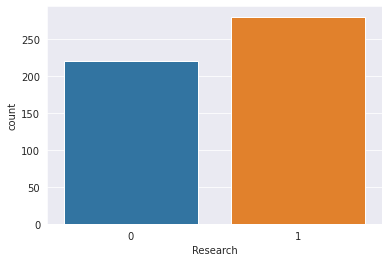

In [7]:
sns.countplot(df['Research'])

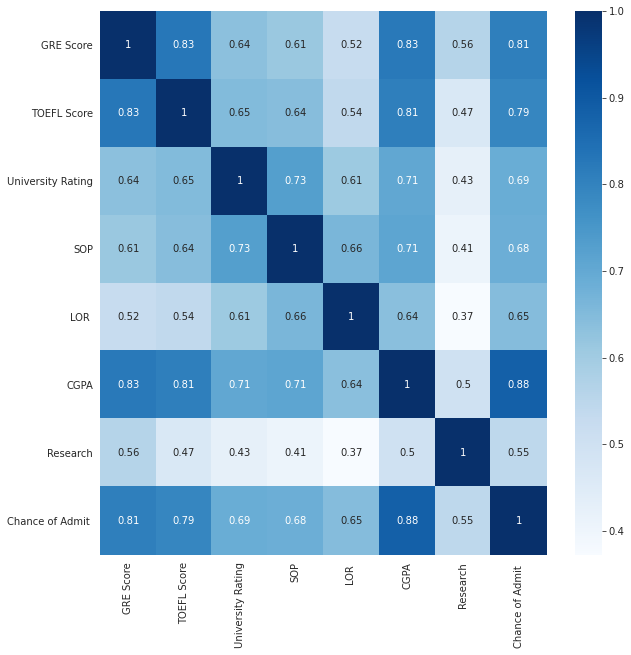

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

# GRE and CGPA clearly determine your chances of admission.

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

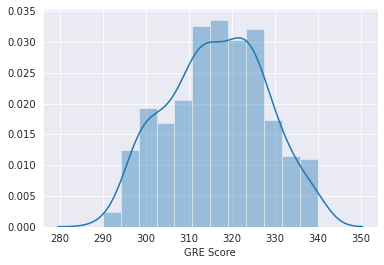

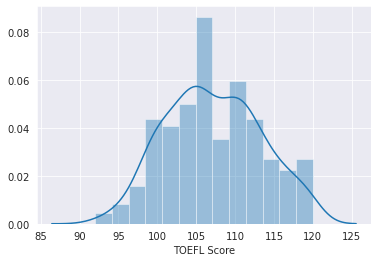

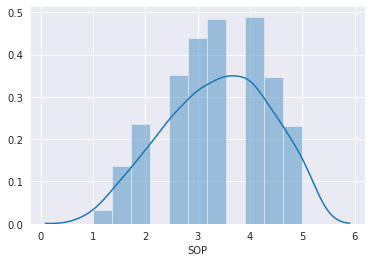

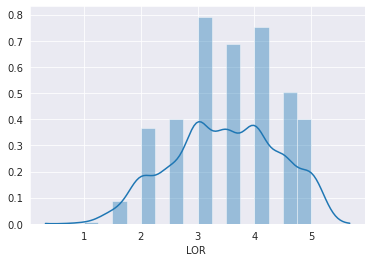

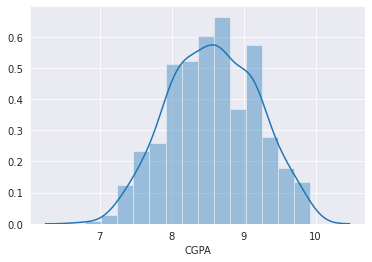

In [10]:
fts = ['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']
for ft in fts:
    sns.distplot(df[ft])
    plt.show()

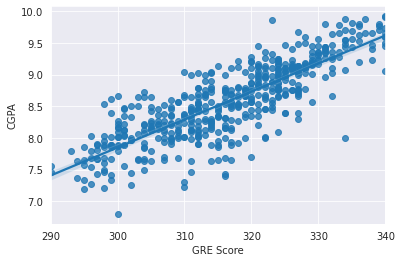

In [11]:
sns.regplot(x='GRE Score',y='CGPA',data=df)

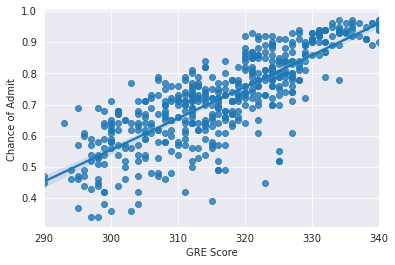

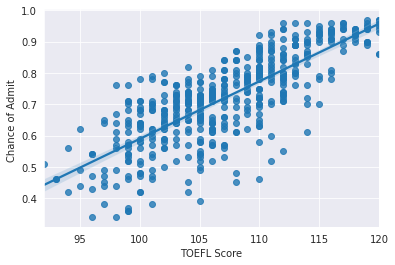

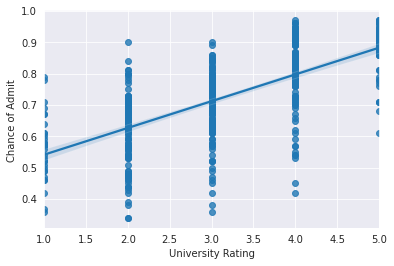

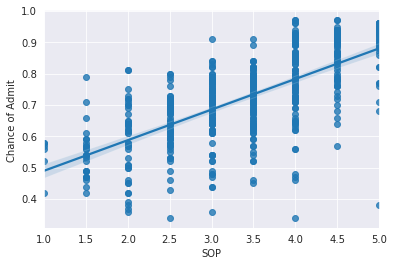

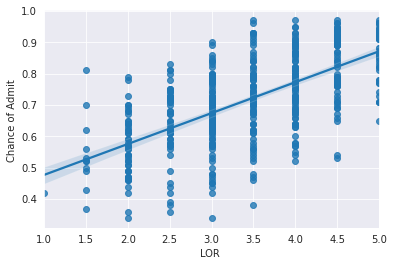

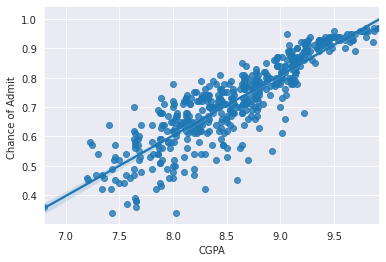

In [12]:
exams =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
for marks in exams:
    sns.regplot(x=marks,y = 'Chance of Admit ',data=df)
    plt.show()

In [13]:
px.scatter(df, x ='GRE Score',y='Chance of Admit ',color='Research')

## Let's Predict!

In [14]:
x = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state = 10)

In [16]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(165, 7)
(335, 7)
(165,)
(335,)


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
scores = cross_val_score(lin_reg,X_test,y_test,cv=5,scoring='r2')

In [19]:
scores.mean()

0.8035997678118555

## 80%

In [20]:
model = LinearRegression(normalize=True)
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8234584363036399

In [21]:
print('Your chances are {}%'.format(round(model.predict([[305, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

Your chances are 69.5%
